<a href="https://colab.research.google.com/github/1S-deb/Twitter_Sentiment_Analysis_Data_Mining_Proj/blob/main/twitter_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the CSV file without header
df = pd.read_csv('twitter_training.csv', header=None)

# Assign correct column names manually
df.columns = ['id', 'game', 'sentiment', 'tweet']

# Handle NaN values in the 'tweet' column by filling them with empty strings
df['tweet'] = df['tweet'].fillna('')

# Check the first few rows (optional, but good for verification)
print(df.head())

tweets = df['tweet']
sentiments = df['sentiment']

X = df['tweet']
# Note: y should be numeric for regression. The original code had a comment about this.
# Make sure to map categorical sentiment values to numeric ones if you are using Linear Regression.
# The mapping provided in the original notebook was done AFTER the split and training, which is incorrect.
# The mapping needs to be done BEFORE splitting the data.
df['sentiment'] = df['sentiment'].map({'Positive': 1, 'Negative': 0, 'Neutral': 0.5, 'Irrelevant': 0.25}) # Added 'Irrelevant' assuming it might be in the data
y = df['sentiment']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize tweets
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Train regression model
model = LinearRegression() # The traceback indicates LogisticRegression was in global variables, but the code uses LinearRegression. Sticking to the code for now.
model.fit(X_train_vect, y_train)

# Predict
y_pred = model.predict(X_test_vect)

# Evaluate
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

     id         game sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                               tweet  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  
MSE: 0.08824163366541736
R2 Score: 0.42871724328969885


In [ ]:
import pandas as pd
import numpy as np

# Create the results DataFrame
results = pd.DataFrame({
    'Tweet': X_test,
    'Actual Sentiment': y_test,
    'Predicted Sentiment': y_pred
})

# Function to classify sentiment from predicted score
def classify_sentiment(score):
    if score >= 0.6:
        return 'Positive'
    elif score >= 0.4:
        return 'Neutral'
    else:
        return 'Negative'

# Apply the function to predicted sentiments
results['Predicted Class'] = results['Predicted Sentiment'].apply(classify_sentiment)

# Optional: classify actual sentiment similarly (if numeric)
def classify_actual_sentiment(score):
    if score >= 0.6:
        return 'Positive'
    elif score >= 0.4:
        return 'Neutral'
    else:
        return 'Negative'

results['Actual Class'] = results['Actual Sentiment'].apply(classify_actual_sentiment)

# Display first 10 rows
print(results.head(10))


                                                   Tweet  Actual Sentiment  \
34877  He said told u I'm getting in that box of a br...              0.25   
21704        Yo this looks LIT! CS: GO / Overwatch combo              1.00   
47008  @HomeDepot attention executive administrators....              0.00   
7969   Guy has notified me and says that my name has ...              0.25   
454    F Loving the new DLC!!!. RhandlerR RhandlerR R...              1.00   
58076                         @ Rainbow6Game out on Xbox              0.00   
39653                  you miss those Battlefield 1 days              1.00   
51601              lmao gamer jason could kill me for it              0.25   
23819  Most popular Google results in the previous ho...              1.00   
60927  thinkin’ about gta strippers rn.. About this one.              0.25   

       Predicted Sentiment Predicted Class Actual Class  
34877             0.211467        Negative     Negative  
21704             0.95453

In [ ]:
from sklearn.metrics import precision_score, accuracy_score, classification_report

# Use the classification functions from before:
def classify_sentiment(score):
    if score >= 0.6:
        return 'Positive'
    elif score >= 0.4:
        return 'Neutral'
    else:
        return 'Negative'

# Convert predicted and actual sentiments to classes
y_test_class = y_test.apply(classify_sentiment)  # If y_test is a pandas Series
y_pred_class = pd.Series(y_pred).apply(classify_sentiment)

# Calculate accuracy
accuracy = accuracy_score(y_test_class, y_pred_class)

# Calculate precision for each class (average='macro' means average precision across classes)
precision = precision_score(y_test_class, y_pred_class, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (macro-average): {precision:.4f}")

# More detailed classification report
print("\nClassification Report:\n", classification_report(y_test_class, y_pred_class))


Accuracy: 0.6246
Precision (macro-average): 0.5981

Classification Report:
               precision    recall  f1-score   support

    Negative       0.76      0.70      0.73      7111
     Neutral       0.37      0.43      0.40      3596
    Positive       0.66      0.67      0.67      4230

    accuracy                           0.62     14937
   macro avg       0.60      0.60      0.60     14937
weighted avg       0.64      0.62      0.63     14937



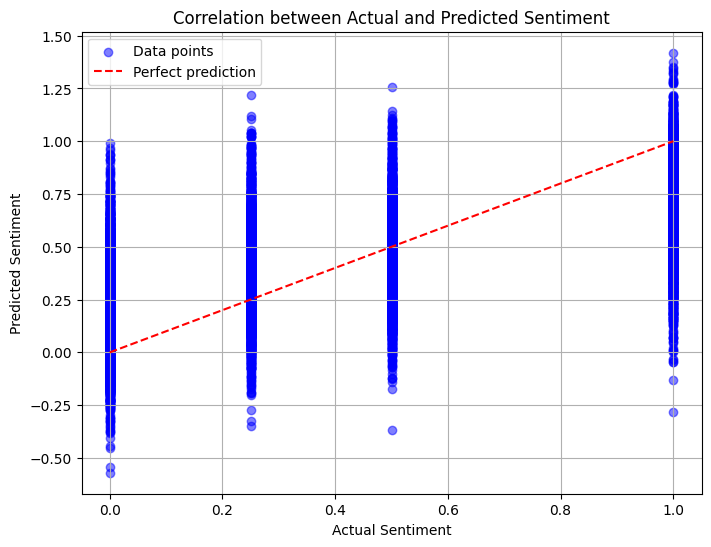

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(results['Actual Sentiment'], results['Predicted Sentiment'], alpha=0.5, color='blue', label='Data points')

# Reference line y=x for perfect prediction
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Perfect prediction')

plt.xlabel('Actual Sentiment')
plt.ylabel('Predicted Sentiment')
plt.title('Correlation between Actual and Predicted Sentiment')
plt.legend()
plt.grid(True)
plt.show()
